<a href="https://colab.research.google.com/github/meriemdouider1/pfe/blob/main/CXTHEILERI%2010%20VARIABLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy 
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
Clt = '/content/Classeurbb.xlsx'
data= pd.read_excel(Clt,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True)

In [3]:
data

,Source,CodeSite,X_long,Y_lat,Cx_theileri,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,Bennouna,Z01-S01-G01,-15.911420,23.794740,0,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,Bennouna,Z01-S05-G01,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,Bennouna,Z01-S05-G02,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,Bennouna,Z01-S07-G01,-13.185620,27.157940,1,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,Bennouna,Z01-S08-G01,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,Trari,Trari_265,-5.283333,35.633333,1,0.000000,0.000000,0.000000,0.000000,0.576012,0,0,3,0,0,0,0,0,0,0,97,1310,460,10,30,74,0,0,74,890,1730,637,551,11,0,0,0,0,0,0,...,26.000000,22.900000,19.500000,17.100000,9.2,9.8,11.3,12.8,15.100000,18.299999,21.000000,21.600000,19.700001,16.600000,13.300000,10.8,1.12,1.18,1.24,1.32,1.54,1.82,2.06,2.17,2.02,1.71,1.39,1.23,3.7,4.1,4.6,4.2,4.1,4.1,4.0,3.8,3.9,3.9,3.4,3.8
297,Trari,Trari_267,-5.325286,35.685852,1,7.352805,115.615433,7.495493,18.920124,0.577831,0,21,1,25,0,0,0,0,25,0,28,1940,730,50,20,87,0,0,87,1290,2690,625,45,50,0,14891,543,68,7,92,...,25.700001,22.400000,19.100000,16.400000,9.7,10.5,12.0,13.5,15.800000,18.600000,21.500000,22.000000,20.200001,16.900000,13.600000,10.9,1.12,1.17,1.24,1.32,1.53,1.81,2.05,2.16,2.

In [4]:
del data["Source"]
del data["CodeSite"]
data.head()

,X_long,Y_lat,Cx_theileri,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.91142,23.79474,0,0.000000,0.0,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.18837,27.13295,0,0.000214,0.0,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.18837,27.13295,0,0.000214,0.0,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.18562,27.15794,1,0.000000,0.0,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.16718,27.15773,0,0.000000,0.0,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8


In [5]:
(data[data["Cx_theileri"]==0]).count

<bound method DataFrame.count of        X_long     Y_lat  Cx_theileri  ...  Vent_Oct  Vent_Nov  Vent_Dec
0   -15.91142  23.79474            0  ...       5.4       5.5       4.9
1   -13.18837  27.13295            0  ...       4.3       3.7       3.8
2   -13.18837  27.13295            0  ...       4.3       3.7       3.8
4   -13.16718  27.15773            0  ...       4.2       3.6       3.8
5   -13.20156  27.16507            0  ...       4.6       3.8       3.9
..        ...       ...          ...  ...       ...       ...       ...
160  -6.00400  30.45600            0  ...       2.7       3.0       2.8
162  -6.23900  30.69500            0  ...       2.7       3.0       3.2
163  -6.91000  30.91300            0  ...       2.7       2.9       2.8
164  -6.86400  30.86600            0  ...       3.4       3.4       3.6
166  -5.00000  31.52220            0  ...       3.4       2.8       3.0

[114 rows x 226 columns]>

In [6]:
(data[data["Cx_theileri"]==1]).count

<bound method DataFrame.count of         X_long      Y_lat  Cx_theileri  ...  Vent_Oct  Vent_Nov  Vent_Dec
3   -13.185620  27.157940            1  ...       4.1       3.7       3.9
7   -13.207000  27.166000            1  ...       4.6       3.8       3.9
11  -13.214230  27.166700            1  ...       4.4       3.6       3.8
15  -10.227900  28.971600            1  ...       3.6       3.3       3.7
18  -10.585830  28.973590            1  ...       3.1       3.4       3.7
..         ...        ...          ...  ...       ...       ...       ...
296  -5.283333  35.633333            1  ...       3.9       3.4       3.8
297  -5.325286  35.685852            1  ...       4.0       3.9       4.3
298  -5.833954  35.759465            1  ...       3.5       3.8       3.9
299  -5.366667  35.766667            1  ...       4.0       4.0       4.2
300  -5.816667  35.783333            1  ...       3.6       3.8       4.0

[187 rows x 226 columns]>

In [7]:
Xt1 = data.loc[:, data.columns != 'Cx_theileri']
yt1 = data.Cx_theileri

In [8]:
Xt1

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,-5.283333,35.633333,0.000000,0.000000,0.000000,0.000000,0.576012,0,0,3,0,0,0,0,0,0,0,97,1310,460,10,30,74,0,0,74,890,1730,637,551,11,0,0,0,0,0,0,0,0,0,...,26.000000,22.900000,19.500000,17.100000,9.2,9.8,11.3,12.8,15.100000,18.299999,21.000000,21.600000,19.700001,16.600000,13.300000,10.8,1.12,1.18,1.24,1.32,1.54,1.82,2.06,2.17,2.02,1.71,1.39,1.23,3.7,4.1,4.6,4.2,4.1,4.1,4.0,3.8,3.9,3.9,3.4,3.8
297,-5.325286,35.685852,7.352805,115.615433,7.495493,18.920124,0.577831,0,21,1,25,0,0,0,0,25,0,28,1940,730,50,20,87,0,0,87,1290,2690,625,45,50,0,14891,543,68,7,92,1,0,93,...,25.700001,22.400000,19.100000,16.400000,9.7,10.5,12.0,13.5,15.800000,18.600000,21.500000,22.000000,20.200001,16.900000,13.600000,10.9,1.12,1.17,1.24,1.32,1.53,1.81,2.05,2.16,2.01,1.71,1.39,1.22,4.0,4.6,4.5,4.2,4.2,4.1,4.0,4.1,4.0,4.0,3.9,4.3
298,-5.833954,35.

In [9]:
lst=["Rad_Juill","Amp2_TempN","Y_lat","Rad_Aout","X_long","Amp1_TempN","Rad_Oct","Min_TempJ","Moy_NDVI","Var_TempN"]

In [10]:
len(lst)

10

In [11]:
X=Xt1[lst]

In [12]:
X

,Rad_Juill,Amp2_TempN,Y_lat,Rad_Aout,X_long,Amp1_TempN,Rad_Oct,Min_TempJ,Moy_NDVI,Var_TempN
0,23739,44,23.794740,23115,-15.911420,102,18177,14721,1106,3
1,23135,55,27.132950,22648,-13.188370,176,17092,14941,1082,9
2,23135,55,27.132950,22648,-13.188370,176,17092,14941,1082,9
3,23055,61,27.157940,22569,-13.185620,160,17043,14854,1090,8
4,23035,58,27.157730,22619,-13.167180,182,17075,14918,1060,9
...,...,...,...,...,...,...,...,...,...,...
296,26270,0,35.633333,23844,-5.283333,0,14087,0,1204,0
297,25964,33,35.685852,23662,-5.325286,295,13926,14374,1211,19
298,27084,35,35.759465,24585,-5.833954,334,14358,14414,1222,24
299,26073,40,35.766667,23626,-5.366667,294,13856,14387,1512,19


In [13]:
yt1

0      0
1      0
2      0
3      1
4      0
      ..
296    1
297    1
298    1
299    1
300    1
Name: Cx_theileri, Length: 301, dtype: int64

In [14]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC

XGBClassifier


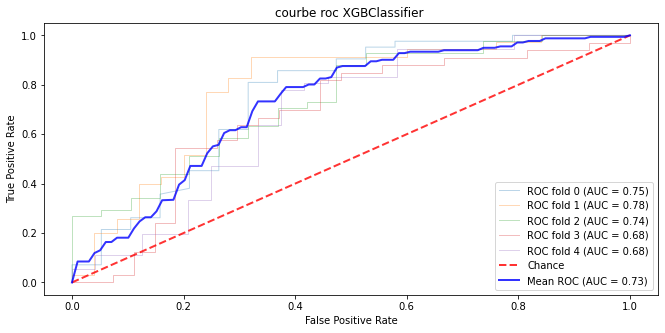

Accuracy: [0.7704918  0.8        0.68333333 0.68333333 0.7       ]
moy_accuracy: 0.73
precision: [0.81818182 0.7804878  0.775      0.66666667 0.725     ]
moy_precision: 0.75
sensibilité : [0.85714286 0.91428571 0.75609756 0.84848485 0.80555556]
moy_sensibilité: 0.84
spécificité : [0.57894737 0.64       0.52631579 0.48148148 0.54166667]
moy_spécificité: 0.55
MCC : [0.45042968 0.5874474  0.27868203 0.35821815 0.36084392]
MCC: 0.41
MCC : [0.45042968 0.5874474  0.27868203 0.35821815 0.36084392]
MCC: 0.41
balanced_accuracy : [0.71804511 0.77714286 0.64120668 0.66498316 0.67361111]
balanced_accuracy: 0.69
roc_auc : [0.75125313 0.78171429 0.7394095  0.67789001 0.68287037]
roc_auc: 0.73
cohen_kappa_scorec : [0.44903226 0.5739645  0.27848101 0.34027778 0.35714286]
cohen_kappa_scorec: 0.40
LogisticRegression


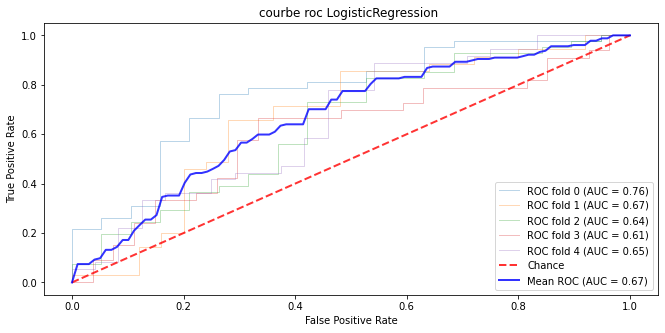

Accuracy: [0.73770492 0.65       0.61666667 0.65       0.68333333]
moy_accuracy: 0.67
precision: [0.86111111 0.75       0.76470588 0.6875     0.71794872]
moy_precision: 0.76
sensibilité : [0.73809524 0.6        0.63414634 0.66666667 0.77777778]
moy_sensibilité: 0.68
spécificité : [0.73684211 0.72       0.57894737 0.62962963 0.54166667]
moy_spécificité: 0.64
MCC : [0.44721515 0.31622777 0.20003833 0.29546842 0.32810304]
MCC: 0.32
MCC : [0.44721515 0.31622777 0.20003833 0.29546842 0.32810304]
MCC: 0.32
balanced_accuracy : [0.73746867 0.66       0.60654685 0.64814815 0.65972222]
balanced_accuracy: 0.66
roc_auc : [0.76441103 0.66742857 0.64441592 0.61167228 0.65393519]
roc_auc: 0.67
cohen_kappa_scorec : [0.43713956 0.30769231 0.19392523 0.29530201 0.32624113]
cohen_kappa_scorec: 0.31
RandomForestClassifier


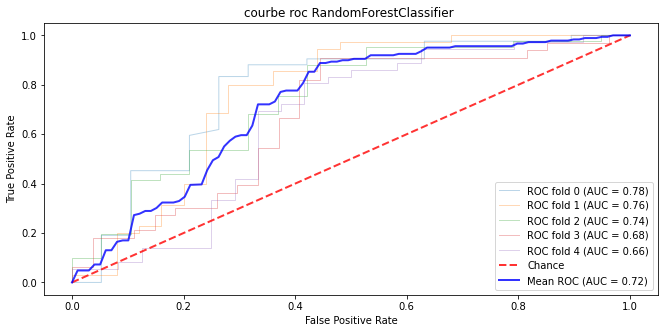

Accuracy: [0.80327869 0.73333333 0.73333333 0.71666667 0.68333333]
moy_accuracy: 0.73
precision: [0.875      0.73170732 0.80487805 0.68181818 0.72972973]
moy_precision: 0.76
sensibilité : [0.83333333 0.85714286 0.80487805 0.90909091 0.75      ]
moy_sensibilité: 0.83
spécificité : [0.73684211 0.56       0.57894737 0.48148148 0.58333333]
moy_spécificité: 0.59
MCC : [0.55573827 0.44209959 0.38382542 0.43939394 0.33586971]
MCC: 0.43
MCC : [0.55573827 0.44209959 0.38382542 0.43939394 0.33586971]
MCC: 0.43
balanced_accuracy : [0.78508772 0.70857143 0.69191271 0.6952862  0.66666667]
balanced_accuracy: 0.71
roc_auc : [0.77882206 0.76       0.74197689 0.67564534 0.65509259]
roc_auc: 0.72
cohen_kappa_scorec : [0.55420219 0.43195266 0.38382542 0.40559441 0.33566434]
cohen_kappa_scorec: 0.42
GradientBoostingClassifier


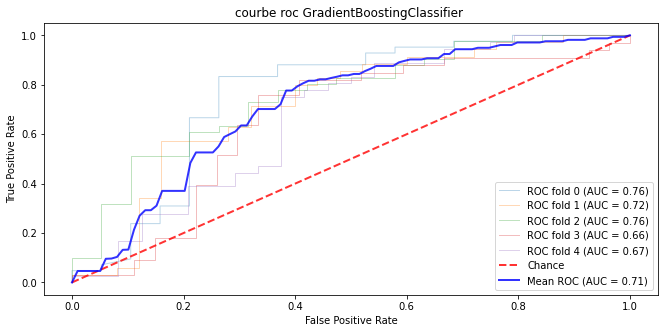

Accuracy: [0.78688525 0.7        0.7        0.66666667 0.68333333]
moy_accuracy: 0.71
precision: [0.85365854 0.68888889 0.82857143 0.65853659 0.71794872]
moy_precision: 0.75
sensibilité : [0.83333333 0.88571429 0.70731707 0.81818182 0.77777778]
moy_sensibilité: 0.80
spécificité : [0.68421053 0.44       0.68421053 0.48148148 0.54166667]
moy_spécificité: 0.57
MCC : [0.510554   0.37084203 0.36942568 0.32048203 0.32810304]
MCC: 0.38
MCC : [0.510554   0.37084203 0.36942568 0.32048203 0.32810304]
MCC: 0.38
balanced_accuracy : [0.75877193 0.66285714 0.6957638  0.64983165 0.65972222]
balanced_accuracy: 0.69
roc_auc : [0.76002506 0.72342857 0.75609756 0.65881033 0.67361111]
roc_auc: 0.71
cohen_kappa_scorec : [0.51019148 0.34545455 0.36094675 0.30795848 0.32624113]
cohen_kappa_scorec: 0.37
GaussianNB


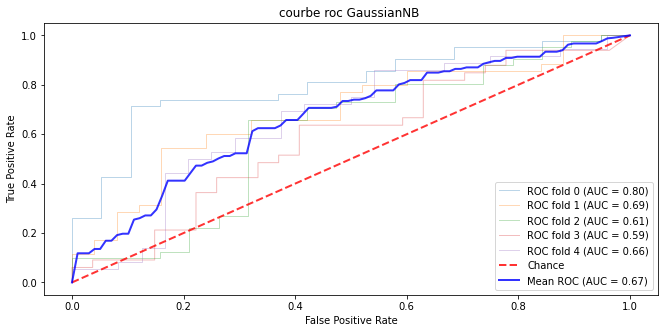

Accuracy: [0.75409836 0.66666667 0.68333333 0.58333333 0.68333333]
moy_accuracy: 0.67
precision: [0.7755102  0.68292683 0.75       0.58333333 0.68888889]
moy_precision: 0.70
sensibilité : [0.9047619  0.8        0.80487805 0.84848485 0.86111111]
moy_sensibilité: 0.84
spécificité : [0.42105263 0.48       0.42105263 0.25925926 0.41666667]
moy_spécificité: 0.40
MCC : [0.37956245 0.29675178 0.23766083 0.13400504 0.31426968]
MCC: 0.27
MCC : [0.37956245 0.29675178 0.23766083 0.13400504 0.31426968]
MCC: 0.27
balanced_accuracy : [0.66290727 0.64       0.61296534 0.55387205 0.63888889]
balanced_accuracy: 0.62
roc_auc : [0.80075188 0.688      0.60590501 0.58698092 0.66087963]
roc_auc: 0.67
cohen_kappa_scorec : [0.36236934 0.28994083 0.23592493 0.11347518 0.2962963 ]
cohen_kappa_scorec: 0.26
KNeighborsClassifier


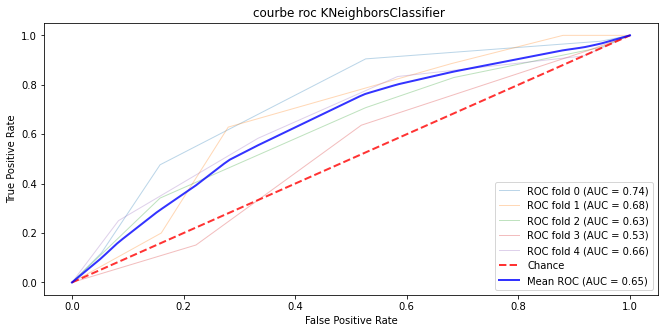

Accuracy: [0.59016393 0.66666667 0.63333333 0.56666667 0.61666667]
moy_accuracy: 0.61
precision: [0.86956522 0.75862069 0.74358974 0.6        0.72413793]
moy_precision: 0.74
sensibilité : [0.47619048 0.62857143 0.70731707 0.63636364 0.58333333]
moy_sensibilité: 0.61
spécificité : [0.84210526 0.72       0.47368421 0.48148148 0.66666667]
moy_spécificité: 0.64
MCC : [0.30414211 0.34388717 0.1765259  0.11891768 0.24508517]
MCC: 0.24
MCC : [0.30414211 0.34388717 0.1765259  0.11891768 0.24508517]
MCC: 0.24
balanced_accuracy : [0.65914787 0.67428571 0.59050064 0.55892256 0.625     ]
balanced_accuracy: 0.62
roc_auc : [0.73684211 0.67714286 0.62708601 0.52637486 0.66319444]
roc_auc: 0.65
cohen_kappa_scorec : [0.24987703 0.33701657 0.17602996 0.11864407 0.2384106 ]
cohen_kappa_scorec: 0.22


In [15]:
classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=7, random_state=11),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred): 
    value = cohen_kappa_score(y_true,y_pred)
    return value


my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)


cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split(X, yt1)):
         clf.fit(X.loc[train,], yt1.loc[train,])
         viz = plot_roc_curve(clf, X.loc[test,], yt1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf, X, yt1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X, yt1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X, yt1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X, yt1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X, yt1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X, yt1, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X, yt1, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X, yt1, scoring=my_scorer2, cv=cv, n_jobs=-1)

    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

In [21]:
classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=7, random_state=11),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)

}
for name, clf in classifiers.items():
    print(name)
    # prepare the cross-validation procedure
    loo =LeaveOneOut()
    # evaluate model
    scores1 = cross_val_score(clf, X, yt1, scoring='accuracy', cv=loo, n_jobs=-1)
    # report performance
    print('accuracy: %.2f' % mean(scores1))

XGBClassifier
accuracy: 0.70
LogisticRegression
accuracy: 0.64
RandomForestClassifier
accuracy: 0.75
GradientBoostingClassifier
accuracy: 0.72
GaussianNB
accuracy: 0.66
KNeighborsClassifier
accuracy: 0.62


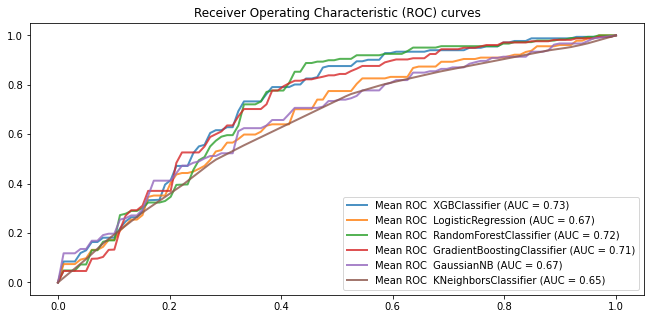

In [22]:
classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=7, random_state=11),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)

}

# prepare plots
fig, ax_roc = plt.subplots(figsize=(11, 5))
cv = KFold(n_splits=5, random_state=1, shuffle=True)
random_state = np.random.RandomState(0)
for name, clf in classifiers.items():
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    for i, (train, test) in enumerate(cv.split(X, yt1)):
        clf.fit(X.loc[train,], yt1.loc[train,])
        viz = plot_roc_curve(clf, X.loc[test,], yt1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax_roc.plot(mean_fpr, mean_tpr,
    label=r'Mean ROC  %s (AUC = %0.2f)' % (name, mean_auc),
        lw=2, alpha=.8)

ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')

plt.legend()
plt.show()